# Gradient Descent  Exercise

This notebook is to introduce and reinforce the ideas of using gradient descent to build models. You should have completed the gradient descent exercise spreadsheet before starting this notebook.

Let's start by developing code that mimics what 1a and 1b do in the worksheet.  Complete the methods below and test the output. 

You can use the numpy **dot** method on ndarrays and you will need to do that for *predict*. 

Here is some documentation for **dot** (https://numpy.org/doc/stable/reference/generated/numpy.dot.html) and (https://www.tutorialspoint.com/numpy/numpy_dot.htm).

In [1]:
import numpy as np

def predict_forloop (x, w):
    """ returns h(x) = w^T x
    Parameters:
       x -- d-dimensional numpy array (with bias value 1 as position 0)
       w -- d-dimensional weight array
    """
    s = 0
    for count, i in enumerate(x):
        s = s + (i *w[count])
    return s

def predict (x, w):
    """ returns h(x) = w^T x
    Parameters:
       x -- d-dimensional numpy array (with bias value 1 as position 0)
       w -- d-dimensional weight array
       This method should NOT use a loop of any kind.
    """
    return np.dot(w,x)


def calc_sse(X, w, y):
    """ returns .5 * sse for the data in X 
    Parameters:
        X - n x d numpy array, n points dimensionality d (with 1's in col 0)
        w - d-dimensional weight array
        y - length-n numpy array of target values
    """    
    matrix = np.array([])
    for count, i in enumerate(y):
        matrix = np.append(matrix, pow((i - predict(X[count,:], w)), 2))
    return np.sum(matrix) / 2

""" Test your method here to see if you get the same answer"""
X = np.array([[1,2],
             [2, 5],
             [2.75, 5.9]])

# Stack bias variable (of all 1s) in front of X
# hstack is a way of hortizonally stacking columns in a matrix
X = np.hstack((np.ones(shape=(X.shape[0],1)),X))
y = np.array([1,6,1])
              
# w needs number of dimensions in X + 1 (for the bias)
w = np.array([0, 1, 0.5])

## Call these methods and see if your results match
## the answers you computed on paper
print(predict_forloop(X[0,:],w))
print(predict(X[0,:],w))

## Can you call predict with a matrix?  Does it do what you want?
print(predict(X ,w))
print(calc_sse(X,w,y))

2.0
2.0
[1.5   3.375 7.95 ]
12.670000000000002


## Impement Batch gradient descent

Let's move on to performing **batch** gradient descent updates.  Recall that for our squared loss function: $$L(w) = \frac{1}{2} \sum_{(x_i, y_i) \in D} (y_i - w^Tx_i)^2$$ we compute our update rule as:

$$w \leftarrow w + \eta \sum_{x_i, y_i \in D)} (y_i - w^Tx_i)x_i$$

Your function will perform **one round** of GD and see if you new values for *w* match the ones you computed on the worksheet.


In [2]:
## reset the data in case X or w have changed.

X = np.array([[1,2],
             [2, 5],
             [2.75, 5.9]])

# Stack bias variable (of all 1s) in front of X
# hstack is a way of hortizonally stacking columns in a matrix
X = np.hstack((np.ones(shape=(X.shape[0],1)),X))
y = np.array([1,6,1])
              
# w needs number of dimensions in X + 1 (for the bias)
w = np.array([0, 1, 0.5])

def batch_gd(X, w, y, eta):
    """ Perform one round of batch gradient descent and return the new
    weight vector.

    Parameters:
        X - n x d numpy array, n points dimensionality d (with 1's in col 0)
        w - d-dimensional weight array
        y - length-n numpy array of target values
        eta - learning rate
    """
    # Your code HERE
    m = np.array([])
    k = np.array([])
    for index, i in enumerate(X):
        k = y[index] - np.sum(np.multiply(i, w))
        n = np.multiply(k, i)
        
        if np.size(m) != 0:
            m = np.vstack([m, n])
        else:
            m = n
    
        
    return np.add(w, np.multiply(eta, np.sum(m, axis = 0)))
    


## Code to validate your answer
print(calc_sse(X, w, y))
w_new = batch_gd(X, w, y, eta=0.01)
print(calc_sse(X, w_new, y))


12.670000000000002
8.844895766278126


## Stochastic Gradient Descent  (SGD)

Write a method to perform SGD.  Process the data points in the order they appear in X.


In [3]:
# set the variables
X = np.array([[1,2],
             [2, 5],
             [2.75, 5.9]])
X = np.hstack((np.ones(shape=(X.shape[0],1)),X))
y = np.array([1,6,1])
              
# w needs number of dimensions in X + 1 (for the bias)
w = np.array([0, 1, 0.5])


def sgd(X, w, y, eta):
    """ Perform one round of stochastic gradient descent and return the new
    weight vector.

    Parameters:
        X - n x d numpy array, n points dimensionality d (with 1's in col 0)
        w - d-dimensional weight array
        y - length-n numpy array of target values
        eta - learning rate
    """
    m = np.array([])
    k = np.array([])
    for index, i in enumerate(X):
        k = y[index] - np.sum(np.multiply(i, w))
        n = np.multiply(k, i)
        
        if np.size(m) != 0:
            m = np.vstack([m, n])
        else:
            m = n    
        w = np.add(w, np.multiply(eta, np.sum(m, axis = 0)))
      
    return w


## test your method

print(calc_sse(X, w, y))
w_new = sgd(X, w, y, 0.01)
print(calc_sse(X, w_new, y))


12.670000000000002
9.002777635338276


## Visualizing Gradient Descent with Lines

Let's use a 1 dimension X (before adding the y-intercept column of 1s) so that
we can visualize our model fitting.

Xorig consists of 20 datapoints spaced evenly between 0 and 8.  The true slope of this line
is 1 and the y-intercept is 2 (yorig).  We add some noise to the datapoints and store these values as y and then modify X so that it has our standard columns of ones as the first column.

Your job is to run gradient descent repeatly to product the best fit model.  You will need to decide on:
* what is the learning rate (eta) to use
* how many iterations is enough (right now the code uses a for loop that goes through 10 times, you could/should change this).



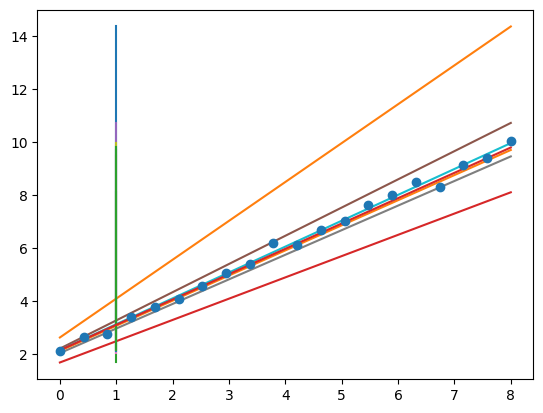

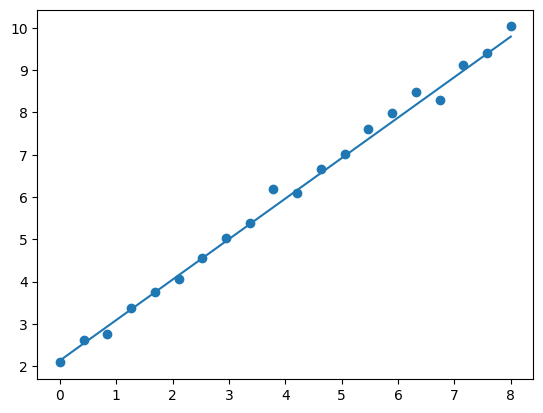

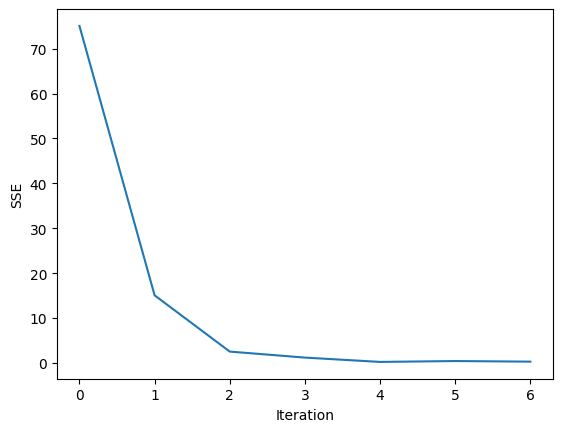

In [20]:
import matplotlib.pyplot as plt
Xorig = np.linspace(0,8,20)
yorig = Xorig + 2 
y = yorig + np.random.normal(0,0.25,yorig.shape[0])
#plt.plot(Xorig,y)
X = np.hstack((np.ones(shape=(Xorig.shape[0],1)),Xorig.reshape(-1,1)))

#print(X)
w = np.array([0.1, 0.1])
sse = []

for i in range(7):
    ## do someething to improve your w values
    w = sgd(X, w, y, .01)
    plt.plot(X, predict(w, X),zorder=1)
    ## compute your SSE and add it to the list sse
    sse.append(calc_sse(X, w, y))
    
plt.scatter(Xorig, y,zorder=3)
plt.show()


## show final fit
plt.clf()
plt.plot(Xorig, predict(w, X),zorder=1)
plt.scatter(Xorig, y,zorder=3)
plt.show()

## show progress
plt.clf()
plt.plot(range(len(sse)),sse)
plt.xlabel("Iteration")
plt.ylabel("SSE")
plt.show()